# Инициализация проекта


In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('csgo_task.csv')

data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [4]:
data = data.drop("map", axis=1) #Никак не влияет на наши дальнейшие рассуждения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   bomb_planted      122410 non-null  bool   
 4   ct_health         122410 non-null  float64
 5   t_health          121627 non-null  float64
 6   ct_armor          122410 non-null  float64
 7   t_armor           122410 non-null  float64
 8   ct_money          122410 non-null  float64
 9   t_money           122410 non-null  float64
 10  ct_helmets        121766 non-null  float64
 11  t_helmets         121560 non-null  float64
 12  ct_defuse_kits    121766 non-null  float64
 13  ct_players_alive  122410 non-null  float64
 14  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(14)
memory usage: 13.2 MB


In [5]:
data.isna().sum()

time_left              0
ct_score               0
t_score             1024
bomb_planted           0
ct_health              0
t_health             783
ct_armor               0
t_armor                0
ct_money               0
t_money                0
ct_helmets           644
t_helmets            850
ct_defuse_kits       644
ct_players_alive       0
t_players_alive      228
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.isna().sum()

time_left           0
ct_score            0
t_score             0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [8]:
data.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0


In [ ]:
data.duplicated().sum()

6308

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

# Разберёмся с нашими значениями

time_left - время до конца раунда

ct_score - счёт спецназовцев

t_score - счёт террористов

ct_health - здоровье спецназовцев

t_health - здоровье террорирстов

ct_armor - броня спецназовцев

t_armor - броня террорирстов

ct_helmets - шлем у спецназовцев

t_helmets - шлем у террористов

ct_defuse_kits - набор сапёра у спецназовцев

ct_players_alive - живих спецназовцев

t_playes_alive - живых террорирстов




# Проанализируем наши данные


CS:GO - компьютерная игра, где задача террорирстов установить бомбу или убить всех спецназовцев, а задача спценаза - убить всех террорирстов или разминировать бомбу. В этой игре зачастую бывают нестандартные ситуации, поэтому нельзя сказать, что игра будет всегда идти по определённому сценарию. В связи с этим, я считаю, что нельзя назвать какие-либо данные выбросами, а так же из-за этого можно потерять часть определённых ситуаций: например у игроков может быть в среднем по 10000, тогда 50000 окажется выбросом.

<Axes: ylabel='time_left'>

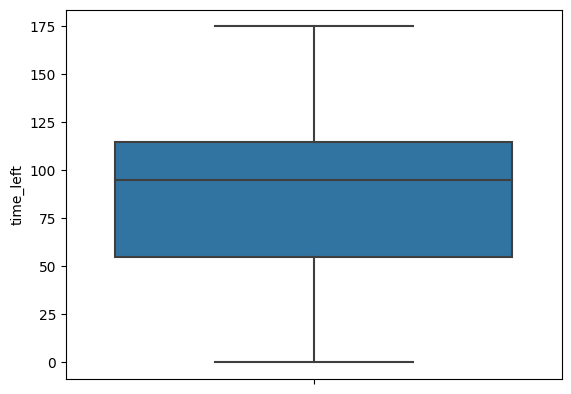

In [ ]:
sns.boxplot(y='time_left',data=data)

<Axes: ylabel='ct_score'>

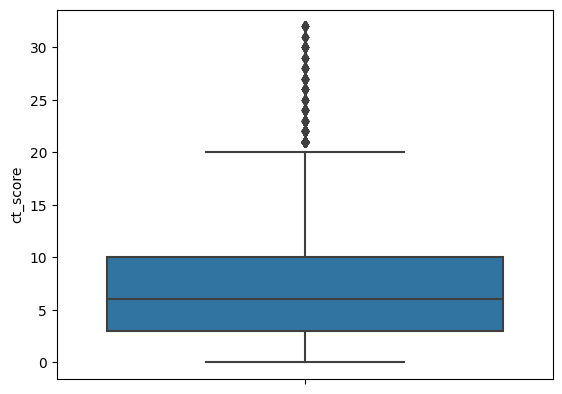

In [ ]:
sns.boxplot(y='ct_score',data=data)

<Axes: ylabel='t_score'>

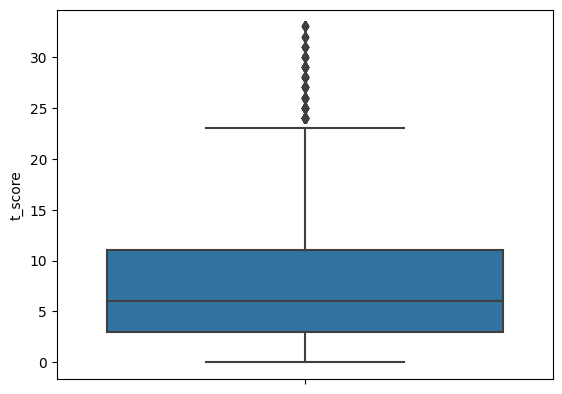

In [ ]:
sns.boxplot(y='t_score',data=data)

<Axes: ylabel='ct_health'>

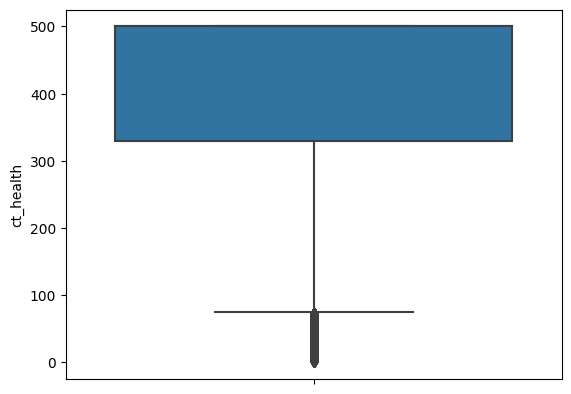

In [ ]:
sns.boxplot(y='ct_health',data=data)

<Axes: ylabel='t_health'>

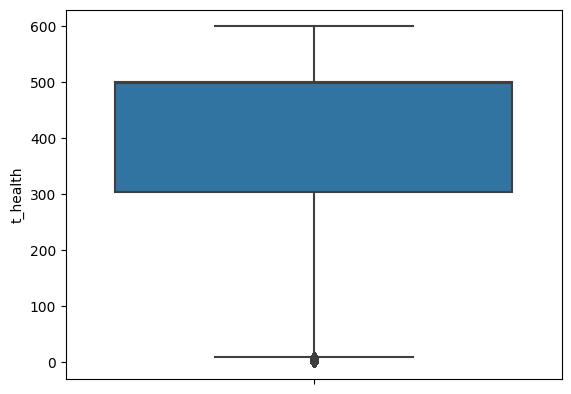

In [ ]:
sns.boxplot(y='t_health',data=data)

<Axes: ylabel='ct_armor'>

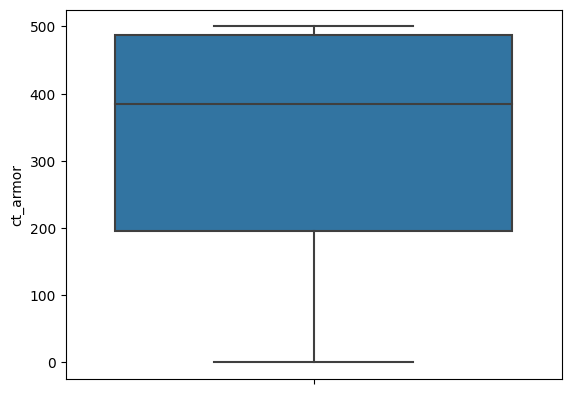

In [ ]:
sns.boxplot(y='ct_armor',data=data)

<Axes: ylabel='t_armor'>

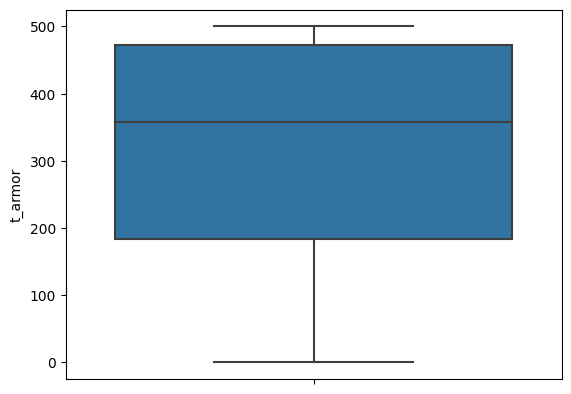

In [ ]:
sns.boxplot(y='t_armor',data=data)

<Axes: ylabel='ct_money'>

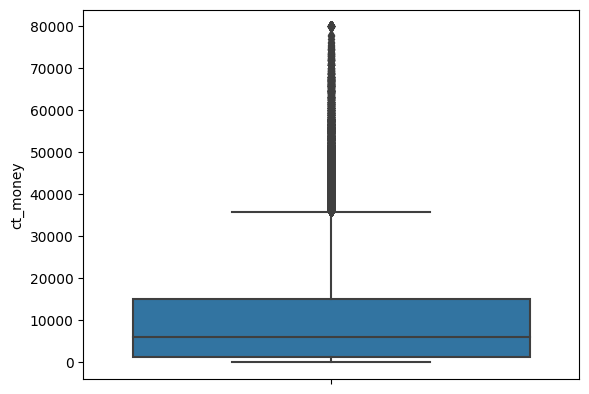

In [ ]:
sns.boxplot(y='ct_money',data=data)

<Axes: ylabel='t_money'>

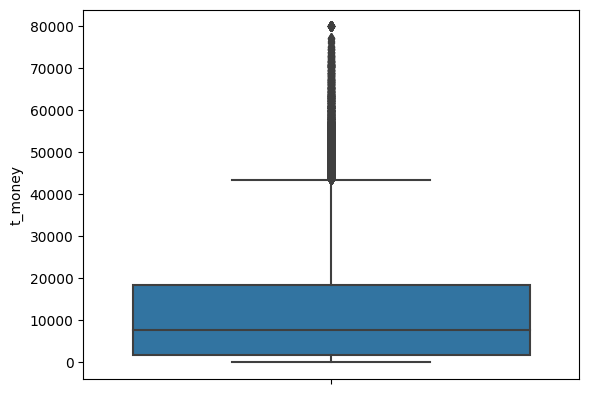

In [ ]:
sns.boxplot(y='t_money',data=data)

# Разберёмся с целевым признаком и предикторами



Установка бомбы зачастую является главным составляющим для победы в раунде, именно поэтому столбец "bomb_planted" и можно назвать целевым признаком. Остальные данные же являются предикторами, потому что они так или иначе зависят от "bomb_planted".

In [10]:
data = pd.get_dummies(data, columns=['bomb_planted'], drop_first=True)
#Преобразование категориальных признаков ("bomb_planted" в дамми переменные)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111988 entries, 0 to 122409
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_left          111988 non-null  float64
 1   ct_score           111988 non-null  float64
 2   t_score            111988 non-null  float64
 3   ct_health          111988 non-null  float64
 4   t_health           111988 non-null  float64
 5   ct_armor           111988 non-null  float64
 6   t_armor            111988 non-null  float64
 7   ct_money           111988 non-null  float64
 8   t_money            111988 non-null  float64
 9   ct_helmets         111988 non-null  float64
 10  t_helmets          111988 non-null  float64
 11  ct_defuse_kits     111988 non-null  float64
 12  ct_players_alive   111988 non-null  float64
 13  t_players_alive    111988 non-null  float64
 14  bomb_planted_True  111988 non-null  bool   
dtypes: bool(1), float64(14)
memory usage: 12.9 MB


# Проверим диcбаланс классов

In [12]:
planted = data[data['bomb_planted_True']==1] #сохраняем где значение столбца True
not_planted = data[data['bomb_planted_True']==0] #сохраняем где значние столбца False

In [13]:
prework = pd.concat([planted, not_planted]) #проверим как было изначально

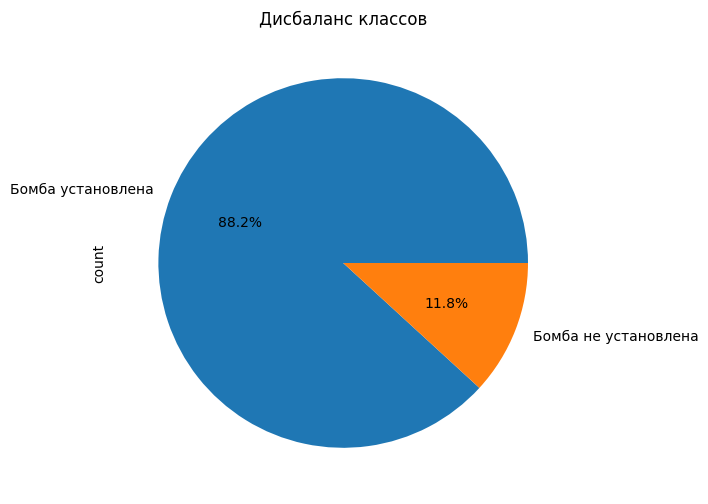

In [14]:
plt.figure(figsize=(6, 6))
prework['bomb_planted_True'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Бомба установлена', 'Бомба не установлена']) #форматирование процентов, подписи секторов (kind='pie' - означает что диаграмма круговая)
plt.title('Диcбаланс классов')
plt.show()

In [15]:
sampling = not_planted.sample(n=len(planted), replace=True, random_state=42)
#Эта строка выполняет сэмплирование (выборку) с целью создать выборку такого же размера, как planted

In [16]:
checker = pd.concat([planted, sampling])

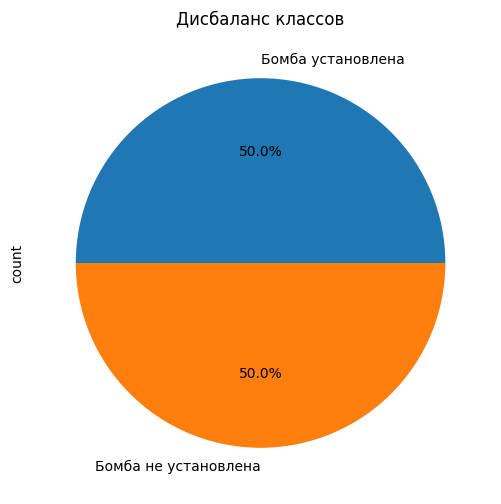

In [17]:
plt.figure(figsize=(6, 6))
checker['bomb_planted_True'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Бомба установлена', 'Бомба не установлена']) #форматирование процентов, подписи секторов (kind='pie' - означает что диаграмма круговая)
plt.title('Диcбаланс классов')
plt.show()

Итак, мы видим, что дизбаланса между классами нет.

# Реализуем KNN

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes=None, normalize=False, cmap='Purples', title='Матрица ошибок'):
    """
    Отображает матрицу ошибок.

    Параметры:
    - y_true: Настоящие метки классов.
    - y_pred: Предсказанные метки классов.
    - classes: Список названий классов.
    - normalize: Если True, матрица ошибок нормализуется.
    - cmap: Цветовая схема для отображения.
    - title: Заголовок графика.
    """
    cm = confusion_matrix(y_true, y_pred)

    if classes is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)

    plt.xlabel('Предсказанные классы')
    plt.ylabel('Фактические классы')
    plt.title(title)
    plt.show()

# Мой KNN

In [19]:
class KNN:
    #принимает параметр k - число соседей
    def __init__(self, k=3):
        self.k = k
    #метод обучения
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    #метод предсказания
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Рассчитать расстояния между x и всеми примерами в обучающем наборе
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Получить индексы K ближайших примеров
        k_neighbors_indices = np.argsort(distances)[:self.k]

        # Получить метки K ближайших примеров
        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        # Найти наиболее часто встречающуюся метку
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [ ]:
# Создание и обучение модели KNN
knn = KNN(k=3)
knn.fit(X_train.values, y_train.values)

# Предсказание меток на тестовом наборе
y_pred = knn.predict(X_test.values)

# Оценка производительности модели
accuracy = np.sum(y_pred == y_test.values) / len(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8514739229024944


In [20]:
def evaluate_knn(X_train, X_test, y_train, y_test):
    # KNN (k-Nearest Neighbors) в машинном обучении - это метод, используемый для классификации и регрессии на основе близости объектов в признаковом пространстве
    # Создание и обучение модели k-Nearest Neighbors
    knn = KNeighborsClassifier().fit(X_train, y_train)

    # Получение предсказаний
    y_pred = knn.predict(X_test)

    # Вывод точности
    print("Точность KNN:")
    print(accuracy_score(y_test, y_pred))

    # Вывод отчета о классификации
    print("Отчёт о классификации:")
    print(classification_report(y_test, y_pred))

    # Визуализация матрицы ошибок
    plot_confusion_matrix(y_test, y_pred)

In [21]:
# Загрузка данных
y = checker["bomb_planted_True"]
X = checker.drop(["bomb_planted_True"], axis=1)

In [22]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17 ) #random_state - фиксирует случайную выборку, чтобы результаты были воспроизводимы

Точность KNN:
0.8456160241874527
Отчёт о классификации:
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      2620
        True       0.82      0.89      0.85      2672

    accuracy                           0.85      5292
   macro avg       0.85      0.85      0.85      5292
weighted avg       0.85      0.85      0.85      5292



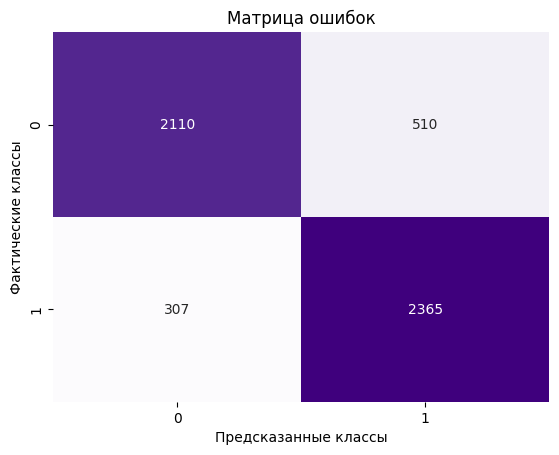

In [23]:
# Оценка модели k-Nearest Neighbors
evaluate_knn(X_train, X_test, y_train, y_test)

# Реализуем LogisticRegression

Точность: 0.783068783068783
Отчёт о классификации:
              precision    recall  f1-score   support

       False       0.74      0.86      0.80      2620
        True       0.83      0.71      0.77      2672

    accuracy                           0.78      5292
   macro avg       0.79      0.78      0.78      5292
weighted avg       0.79      0.78      0.78      5292



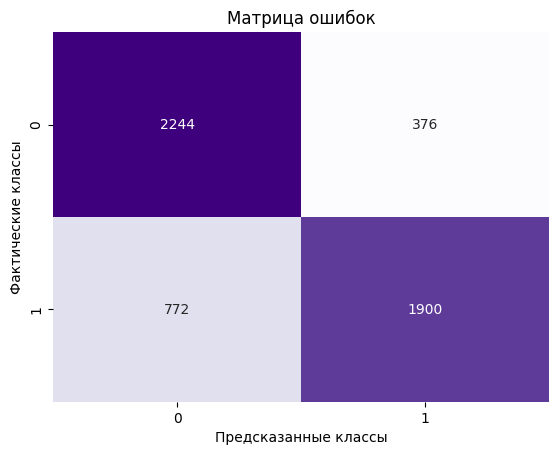

In [24]:
def logistic_regression_evaluation(X_train, X_test, y_train, y_test):
    # Основная идея логистической регрессии заключается в том, чтобы прогнозировать вероятность принадлежности примера данных к одному из двух классов (бинарная классификация)
    # Создание и обучение модели логистической регрессии
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)

    # Получение предсказаний
    y_pred = clf.predict(X_test)

    # Вывод метрик
    print("Точность:", accuracy_score(y_test, y_pred))
    print("Отчёт о классификации:")
    print(classification_report(y_test, y_pred))

    # Вывод матрицы ошибок
    plot_confusion_matrix(y_test, y_pred)

logistic_regression_evaluation(X_train, X_test, y_train, y_test)

# Реализуем Naive Bayes (Наивный байесовский классификатор)

In [25]:
def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    # Наивный байесовский классификатор (Naive Bayes Classifier) - это вероятностный метод классификации, основанный на теореме Байеса с предположением о независимости между признаками
    # Создание и обучение модели Naive Bayes
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)

    # Получение предсказаний
    y_pred = classifier.predict(X_test)

    # Вывод точности
    print("Точность Naive Bayes:")
    print(accuracy_score(y_test, y_pred))

    # Вывод отчета о классификации
    print("Отчёт о классификации:")
    print(classification_report(y_test, y_pred))

    # Визуализация матрицы ошибок
    plot_confusion_matrix(y_test, y_pred)

Точность Naive Bayes:
0.9030612244897959
Отчёт о классификации:
              precision    recall  f1-score   support

       False       0.92      0.88      0.90      2620
        True       0.89      0.92      0.91      2672

    accuracy                           0.90      5292
   macro avg       0.90      0.90      0.90      5292
weighted avg       0.90      0.90      0.90      5292



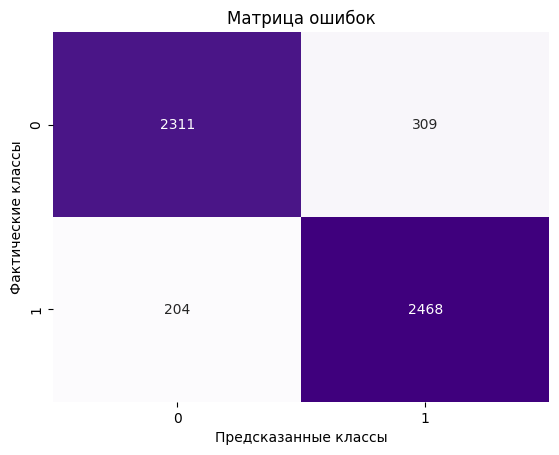

In [26]:
evaluate_naive_bayes(X_train, X_test, y_train, y_test)

# Реализуем метод опорных векторов (SVM)

In [27]:
svm_classifier_linear = SVC(kernel='linear').fit(X_train, y_train) #линйное ядро
svm_classifier_rbf = SVC(kernel='rbf').fit(X_train, y_train) #радиально-базисное ядро
svm_classifier_poly = SVC(kernel='poly').fit(X_train, y_train) #полиномиальное ядро

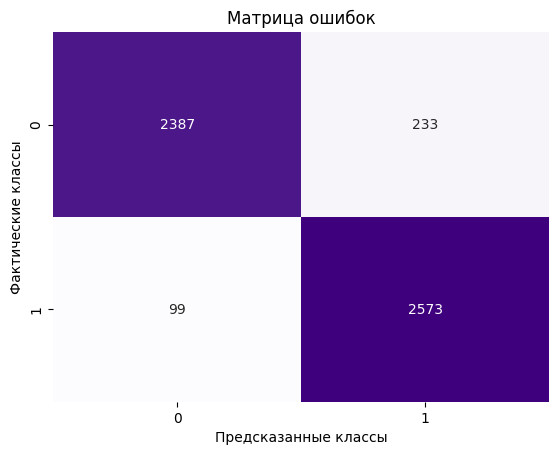

In [28]:
plot_confusion_matrix(y_test, svm_classifier_linear.predict(X_test))

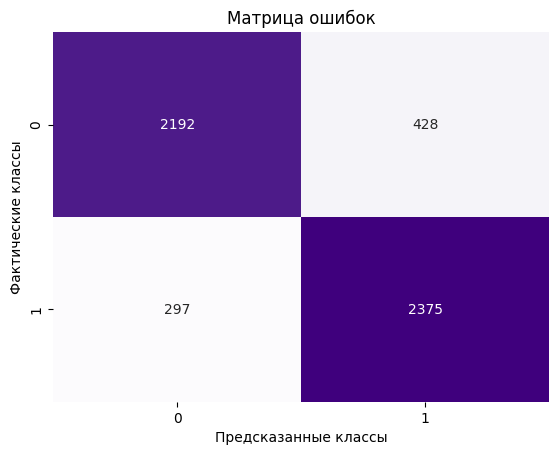

In [29]:
plot_confusion_matrix(y_test, svm_classifier_rbf.predict(X_test))

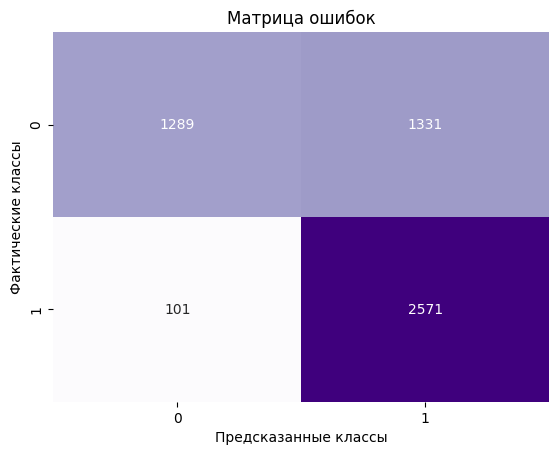

In [30]:
plot_confusion_matrix(y_test, svm_classifier_poly.predict(X_test))

# Реализуем метрики Accuracy, Precision, Recall, F1

In [31]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_bin_knn_pred = knn.predict(X_test)
def acc_score(y_true, y_pred):
    """
    y_true: Настоящие метки классов.
    y_pred: Предсказанные метки классов.

    Возвращает:
    Значение метрики Accuracy.
    """
    correct = 0  # Инициализация счётчика правильных предсказаний
    total = len(y_true)  # Получение общего числа предсказаний

    # Итерация по каждой паре истинной и предсказанной меток
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1  # Увеличение счётчика, если предсказание верное

    # Вычисление точности: количество правильных предсказаний делённое на общее количество
    accuracy = correct / total

    return accuracy

In [32]:
def precision(y_true, y_pred):
    true_positives = 0 #действительно положительные
    false_positives = 0 #ложно положительные

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            true_positives += 1 #если модель правильно предсказаала
        if true == 0 and pred == 1:
            false_positives += 1 #если неправильно

    if true_positives + false_positives == 0: #если модель не сделала ни одного положительного предсказания (защита от деления на ноль)
        return 0

    precision = true_positives / (true_positives + false_positives) #вычисление метрики точности (отношение найденных положительных примеров ко всем реально положительным)
    return precision #проверка своей и эталонной

In [33]:
def recall(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            true_positives += 1
        if true == 1 and pred == 0:
            false_negatives += 1

    if true_positives + false_negatives == 0: #если модель не сделала ни одного положительного предсказания (защита от деления на ноль)
        return 0

    recall = true_positives / (true_positives + false_negatives) #вычисление метрики полноты (отношение найденных положительных примеров ко всем реально положительным)
    return recall

In [34]:
def f1(y_true, y_pred):
    precision1= precision(y_true, y_pred) #Сколько предсказаний модели являются релевантными?
    recall1 = recall(y_true, y_pred) #Какую часть положительных примеров нашла модель?

    if precision1 + recall1 == 0: #если модель не сделала ни одного положительного предсказания (защита от деления на ноль)
        return 0

    f1 = 2 * (precision1 * recall1) / (precision1 + recall1) #нахождение баланса между этими двумя метриками (максимальное значение - 1)
    return f1

In [35]:
print(acc_score(y_test, y_bin_knn_pred))
print(precision(y_test, y_bin_knn_pred))
print(recall(y_test, y_bin_knn_pred))
print(f1(y_test, y_bin_knn_pred))

0.8456160241874527
0.8226086956521739
0.8851047904191617
0.8527131782945736


In [36]:
#какие значения выдают эталонные функции
print(accuracy_score(y_test, y_bin_knn_pred)) #общая точность модели
print(precision_score(y_test, y_bin_knn_pred)) #сколько положительных действительно положительных (предсказанных)
print(recall_score(y_test, y_bin_knn_pred)) #сколько положительных действительно положительных (реальных)
print(f1_score(y_test, y_bin_knn_pred)) #гармоническое среднее между precision и recall

0.8456160241874527
0.8226086956521739
0.8851047904191617
0.8527131782945736


# Итоговая модель классификаторов

In [37]:
classifiers = {
    'SVC': SVC(),
    'KNN classifier': KNeighborsClassifier(1), #с одним нельзя!!!! (оптимально - 5)
    'LogisticRegression': LogisticRegression(solver='saga', penalty='l2', max_iter=800, C=0.01), #алгоритм оптимизации, регурялизация Lasso, макс. число итераций, коэфф. регурялизации
    'GaussianNB': GaussianNB() #наивный байесовский классификатор
}

In [38]:
n_classifiers = len(classifiers) #число моделей

for index, (name, classifier) in enumerate(classifiers.items()): #цикл по всем моделям словаря
    '''
    name - название модели
    classifier - объект модели
    index - номер итерации цикла
    classifiers.items() - метод, который возвращает пары (ключ, значение) для словаря
    '''
    classifier.fit(X_train, np.ravel(y_train)) #обучение модели на тренировочных данных

    y_pred = classifier.predict(X_test) #предсказание модели на тестовых данных
    accuracy = accuracy_score(y_test, y_pred) #доля правильных ответов
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))
    print()

Accuracy (train) for SVC: 86.3% 
              precision    recall  f1-score   support

       False       0.88      0.84      0.86      2620
        True       0.85      0.89      0.87      2672

    accuracy                           0.86      5292
   macro avg       0.86      0.86      0.86      5292
weighted avg       0.86      0.86      0.86      5292


Accuracy (train) for KNN classifier: 85.0% 
              precision    recall  f1-score   support

       False       0.86      0.83      0.85      2620
        True       0.84      0.87      0.85      2672

    accuracy                           0.85      5292
   macro avg       0.85      0.85      0.85      5292
weighted avg       0.85      0.85      0.85      5292


Accuracy (train) for LogisticRegression: 77.6% 
              precision    recall  f1-score   support

       False       0.72      0.89      0.80      2620
        True       0.86      0.66      0.75      2672

    accuracy                           0.78      5292
 

# Реализуем ROC-AUC и ROC-CURVE

In [39]:
def roc_auc(y_true, y_pred_proba):

    # Вычисляем координаты ROС
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Вычисляем разности по оси X (fpr)
    fpr_differences = np.diff(fpr)
    
    # Вычисляем среднюю величину TPR на каждом шаге
    tpr_averages = (tpr[:-1] + tpr[1:]) / 2
    
    # Вычисляем произведения разностей на средние значения
    tpr_differences_prod = fpr_differences * tpr_averages
        
    # Суммируем произведения
    auc_roc = np.sum(tpr_differences_prod)

    plt.plot(fpr, tpr, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()

    return auc_roc

accuracy:  0.8456160241874527
precision:  0.8226086956521739
recall:  0.8851047904191617
f1_scorey:  0.8527131782945736


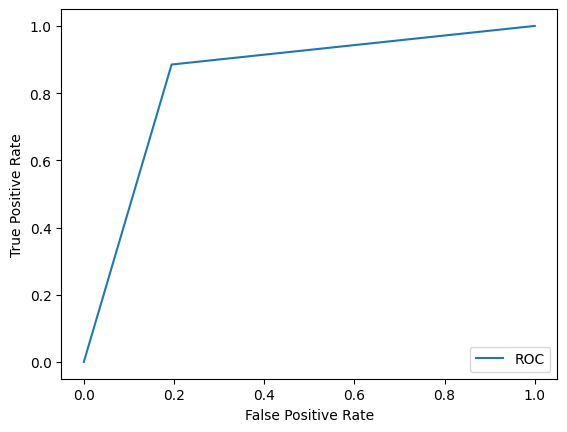

roc auc:  0.8452241509347718


In [40]:
model_knn = KNeighborsClassifier().fit(X_train, y_train)
prediction = model_knn.predict(X_test)
print("accuracy: ",acc_score(y_test, prediction))
print("precision: ",precision(y_test, prediction))
print("recall: ",recall(y_test, prediction))
print("f1_scorey: ",f1(y_test, prediction))
print("roc auc: ",roc_auc(y_test, prediction))